## Classification Models

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

In [2]:
matHealth = pd.read_csv(r"C:\Users\Josh\Desktop\dabp_final-main\PAHealth_MaternalChildHealth_20221114.csv").iloc[:, 1:]
print(matHealth.shape)
matHealth.head()

(68, 49)


,County0,MICH-01_2011-2015,MICH-01_2012-2016,MICH-01_2013-2017,MICH-01_2014-2018,MICH-01_2015-2019,MICH-01_MetGoal,MICH-02_2011-2015,MICH-02_2012-2016,MICH-02_2013-2017,...,MICH-10_2013-2017,MICH-10_2014-2018,MICH-10_2015-2019,MICH-10_MetGoal,MICH-13_2011-2015,MICH-13_2012-2016,MICH-13_2013-2017,MICH-13_2014-2018,MICH-13_2015-2019,MICH-13_MetGoal
0,Pennsylvania,6.5,6.4,6.2,6.1,6.0,No,6.5,6.4,6.2,...,6.2,6.1,6.0,No,6.5,6.4,6.2,6.1,6.0,No
1,Adams,3.8,3.7,4.8,5.7,4.7,Yes,3.8,3.7,4.8,...,4.8,5.7,4.7,Yes,3.8,3.7,4.8,5.7,4.7,Yes
2,Allegheny,6.1,6.1,6.1,5.9,6.0,No,6.1,6.1,6.1,...,6.1,5.9,6.0,No,6.1,6.1,6.1,5.9,6.0,No
3,Armstrong,4.6,5.7,5.8,4.3,6.3,No,4.6,5.7,5.8,...,5.8,4.3,6.3,No,4.6,5.7,5.8,4.3,6.3,No
4,Beaver,7.2,6.8,6.6,6.4,7.2,No,7.2,6.8,6.6,...,6.6,6.4,7.2,No,7.2,6.8,6.6,6.4,7.2,No


In [3]:
goals_met = matHealth[[m for m in matHealth.columns if 'MetGoal' in m]].replace({'No':0, 'Yes':1})
goals_met['Total_MetGoals'] = goals_met.sum(axis=1)
goals_met.head()

,MICH-01_MetGoal,MICH-02_MetGoal,MICH-03_MetGoal,MICH-06_MetGoal,MICH-07_MetGoal,MICH-08_MetGoal,MICH-10_MetGoal,MICH-13_MetGoal,Total_MetGoals
0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,8
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [4]:
cols = ['County0']
cols.extend([m for m in matHealth.columns if '2019' in m])
cols

['County0',
 'MICH-01_2015-2019',
 'MICH-02_2015-2019',
 'MICH-03_2015-2019',
 'MICH-06_2015-2019',
 'MICH-07_2015-2019',
 'MICH-08_2015-2019',
 'MICH-10_2015-2019',
 'MICH-13_2015-2019']

In [5]:
outcomes = matHealth[cols]
outcomes['MetGoals_Reached'] = matHealth['MICH-01_MetGoal'].replace({'Yes': 1, 'No': 0})
outcomes

<ipython-input-5-28fe2685ec72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes['MetGoals_Reached'] = matHealth['MICH-01_MetGoal'].replace({'Yes': 1, 'No': 0})


,County0,MICH-01_2015-2019,MICH-02_2015-2019,MICH-03_2015-2019,MICH-06_2015-2019,MICH-07_2015-2019,MICH-08_2015-2019,MICH-10_2015-2019,MICH-13_2015-2019,MetGoals_Reached
0,Pennsylvania,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0
1,Adams,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.7,1
2,Allegheny,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0
3,Armstrong,6.3,6.3,6.3,6.3,6.3,6.3,6.3,6.3,0
4,Beaver,7.2,7.2,7.2,7.2,7.2,7.2,7.2,7.2,0
...,...,...,...,...,...,...,...,...,...,...
63,Washington,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
64,Wayne,DSU,DSU,DSU,DSU,DSU,DSU,DSU,DSU,DSU
65,Westmoreland,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,1
66,Wyoming,DSU,DSU,DSU,DSU,DSU,DSU,DSU,DSU,DSU


## KNN Classifier

In [6]:
outcomes = outcomes[outcomes.MetGoals_Reached != 'DSU']

In [7]:
data = outcomes.columns[1:9]
target = outcomes.columns[9]

In [37]:
X = outcomes[data]
y = outcomes[target]
y=y.astype('int')
                     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=60)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)                                    
print(knn.predict(X_test))

[1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1]


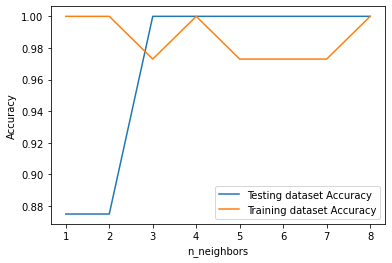

In [38]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Cluster Plots & Naive Bayes

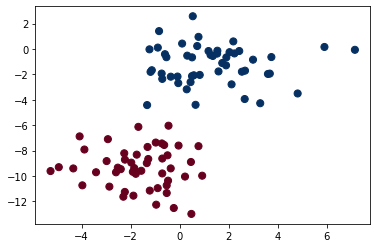

In [39]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [43]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

<AxesSubplot:>

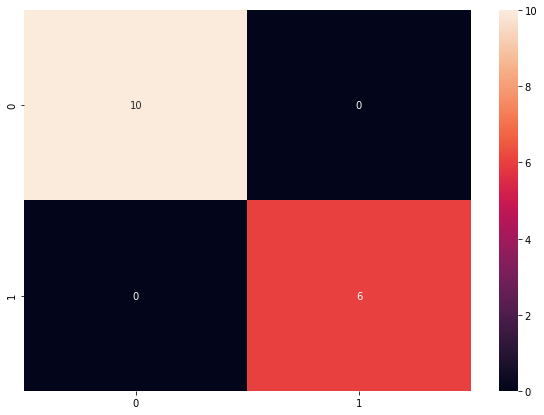

In [50]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)